In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_data = pd.read_csv("train_data.csv")

In [ ]:
test_data = pd.read_csv("test_data.csv")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523975 entries, 0 to 1523974
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentence   1523975 non-null  object
 1   sentiment  1523975 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ MB


In [ ]:
test_data.shape

(359, 2)

In [ ]:
def preprocess_text(text):
  text = re.sub(r'http\S+','',text)
  text = re.sub(r'@\w+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'[^\w\s]','',text)
  return text.lower()

In [ ]:
train_data['sentence'] = train_data['sentence'].apply(preprocess_text)

In [ ]:
test_data['sentence'] = test_data['sentence'].apply(preprocess_text)

In [ ]:
vectorizer =TfidfVectorizer(max_features=5000)

In [ ]:
X_train = vectorizer.fit_transform(train_data['sentence'])
X_test = vectorizer.transform(test_data['sentence'])

In [ ]:
y_train = train_data['sentiment']
y_train.fillna(y_train.median())
y_test = test_data['sentiment']
y_test.fillna(y_test.median())
y_train

,sentiment
0,0
1,0
2,0
3,0
4,0
...,...
1523970,1
1523971,1
1523972,1
1523973,1


In [ ]:
Lr_model = LogisticRegression()
Lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = Lr_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       177
           1       0.79      0.85      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359



Text(50.722222222222214, 0.5, 'Real Values')

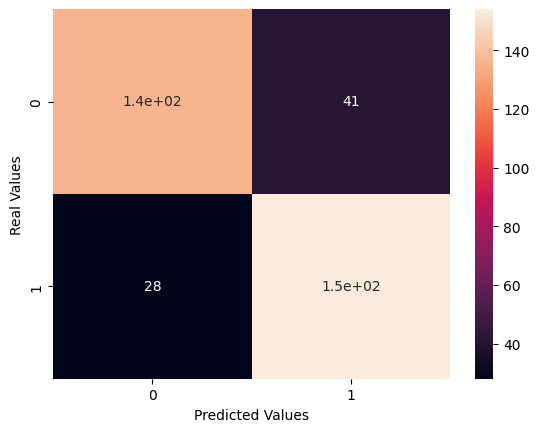

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_pred)
sn.heatmap(matrix,annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')

In [ ]:
import joblib

In [ ]:
joblib.dump(Lr_model, 'sentiment_analyzing_model.pkl')

['sentiment_analyzing_model.pkl']

In [ ]:
joblib.dump(vectorizer,'sa_vectorizer.pkl')

['sa_vectorizer.pkl']